[DocumentLink](http://tiny.cc/04-07-2020)

[DecisionTree](http://tiny.cc/DecisionTrees)

[OF&UF](http://tiny.cc/OF-UF)


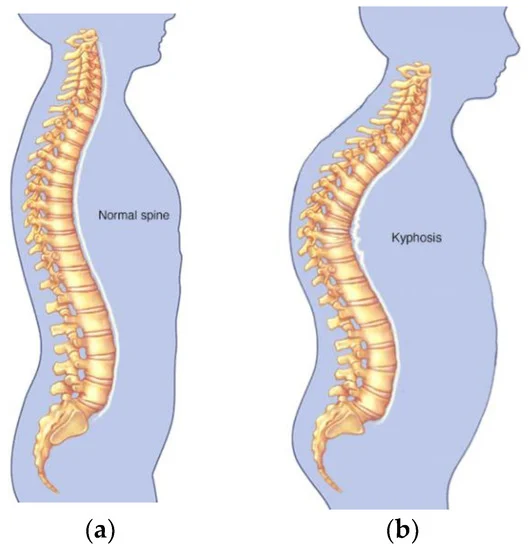

(a) A normal spine (without kyphosis); (b) Patient with abnormal spine (kyphosis).

Problem Statement:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems. The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using childen dataset Kyphosis

INPUTS:

Age: in months
Number: the number of vertebrae involved
Start: the number of the first (topmost) vertebra operated on.
OUTPUT:

Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation


In [1]:
## Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
data.shape

(81, 4)

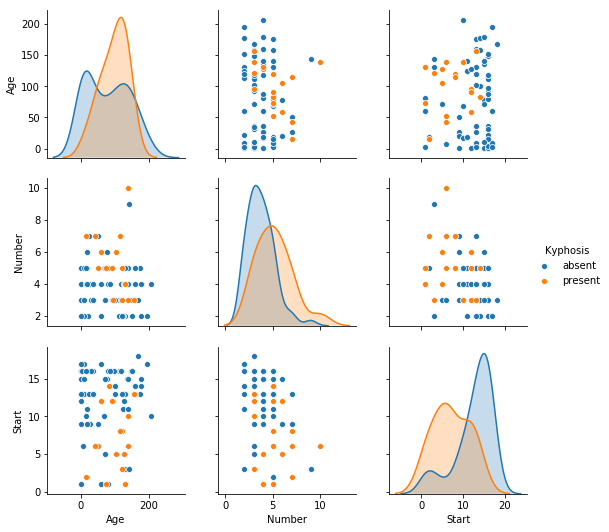

In [4]:
sns.pairplot(data, hue='Kyphosis')

In [5]:
# Splitting the data set into Input and Output

#X = data.iloc[:, 1:]
X= data.drop('Kyphosis', axis=1)
y= data.Kyphosis

In [6]:
# X_train

In [7]:
# y_train


In [8]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#initailization of object
dtree = DecisionTreeClassifier()

# Applying the classifier to the dataset
# syntax: objectname.fit(InputValues, OutputValues)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
# Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [11]:
# Classification Report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [12]:
confusion_matrix(y_train, y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [13]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred =  dtree.predict(X_test)  #  corresponding output of X_test is stored in y_test
# Comapre the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

   micro avg       0.71      0.71      0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



In [ ]:
# Visualization of the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtree)
plt.show()

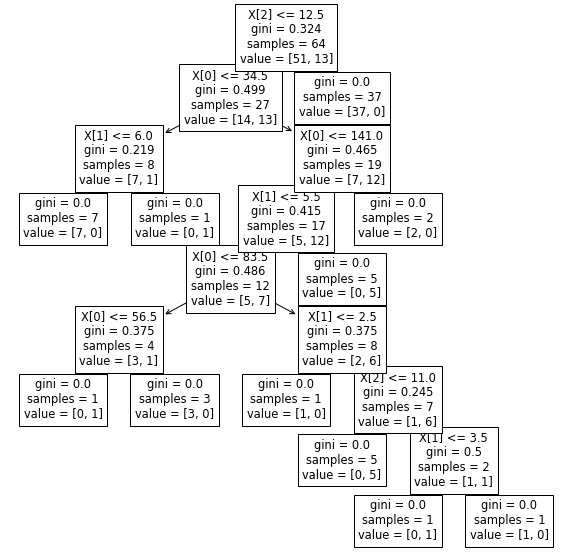

In [15]:
# KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train, y_train, cv =5)

array([0.78571429, 0.76923077, 0.92307692, 0.91666667, 0.91666667])

### GridSearchCV

In [16]:
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1)
    
}

In [17]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
# return the optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}

In [19]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 16, min_samples_leaf= 2)

# We need to fit the model to the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      absent       0.77      0.77      0.77        13
     present       0.25      0.25      0.25         4

   micro avg       0.65      0.65      0.65        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.65      0.65      0.65        17



After applying GridSearch, we can say that our scores have been increased to some exten